<a href="https://colab.research.google.com/github/OscarLoOscar/python_Data_Science/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import datetime
%matplotlib inline
!pip install yfinance
import yfinance as yf


[*********************100%%**********************]  1 of 1 completed
<ipython-input-15-9460efe63432>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  437.929993  439.269989  435.640015  439.250000  423.808380   
2022-01-04  440.579987  441.260010  437.220001  439.070007  423.634674   
2022-01-05  438.779999  439.410004  430.529999  430.660004  415.520386   
2022-01-06  430.200012  432.829987  427.899994  430.079987  414.960754   
2022-01-07  430.209991  431.359985  427.200012  428.589996  413.523102   

             Volume  
Date                 
2022-01-03  6017300  
2022-01-04  6262200  
2022-01-05  7539600  
2022-01-06  7971500  
2022-01-07  6157500  
                  Open        High         Low       Close
Date                                                      
2024-05-09  475.589996  478.149994  474.940002  478.149994
2024-05-10  479.690002  480.390015  477.589996  478.739990
2024-05-13  480.350006  480.420013  477.730011  478.769989
2024-05-14  478.980011  481.4700

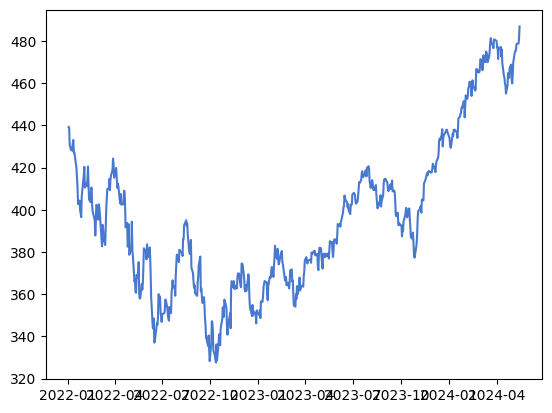

                  Open        High         Low       Close    Return  \
Date                                                                   
2024-05-09  475.589996  478.149994  474.940002  478.149994  1.005742   
2024-05-10  479.690002  480.390015  477.589996  478.739990  1.001234   
2024-05-13  480.350006  480.420013  477.730011  478.769989  1.000063   
2024-05-14  478.980011  481.470001  478.480011  481.040009  1.004741   
2024-05-15  483.339996  487.230011  482.739990  486.899994  1.012182   

               Bench_Bal  
Date                      
2024-05-09  10885.600316  
2024-05-10  10899.032219  
2024-05-13  10899.715174  
2024-05-14  10951.394617  
2024-05-15  11084.803504  
-25.41
                  Open        High         Low       Close    Return  \
Date                                                                   
2024-05-09  475.589996  478.149994  474.940002  478.149994  1.005742   
2024-05-10  479.690002  480.390015  477.589996  478.739990  1.001234   
2024-05-13 

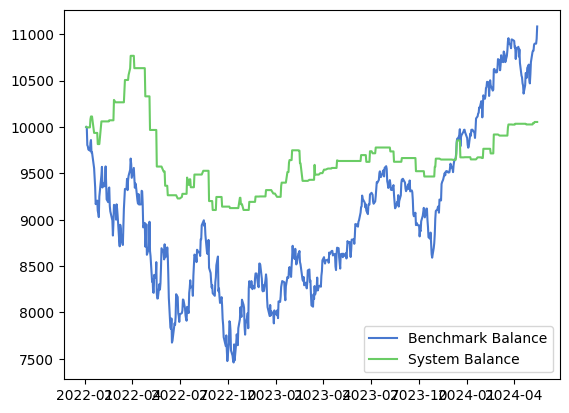

-15.45
Benchmark Total Return: 10.85%
Benchmark CAGR: 4.44%
Benchmark DD: -25.41%

System Total Return: 0.54%
System CAGR: 0.23%
System DD: -15.45%
Time in Market: 16.81%
Trades Won: 56
Trades Lost: 42
Winrate: 57.14%
Final System Balance: 10054.319495177777


In [ ]:
# Define the start and end dates
START = datetime.datetime(2022, 1, 1)
END = datetime.datetime(2024, 5, 16)
YEARS = (END - START).days / 365.25

# Define the starting balance and percentage threshold
STARTING_BALANCE = 10000
PCT_THRESH = 92 #要在即日收市價，達至相當於當日高低波幅的 92% 或以上，才是買入訊號。

# Download historical price data for Bitcoin
price = yf.download('VOO', START, END)
print(price.head())

# Drop columns 'Volume' and 'Adj Close'
price = price.drop(['Volume', 'Adj Close'], axis=1)
print(price.tail())

# Plot the closing price
plt.style.use('seaborn-muted')
plt.plot(price['Close'])
plt.show()

# Calculate the daily returns
price['Return'] = price['Close'] / price['Close'].shift(1)
price['Return'].iat[0] = 1

# Calculate benchmark balance
price['Bench_Bal'] = STARTING_BALANCE * price['Return'].cumprod()
print(price.tail())

# Calculate the peak of the benchmark balance and drawdown
price['Bench_Peak'] = price['Bench_Bal'].cummax()
price['Bench_DD'] = price['Bench_Bal'] - price['Bench_Peak']
bench_dd = round(((price['Bench_DD'] / price['Bench_Peak']).min() * 100), 2)
print(bench_dd)

# Calculate range and distance from low
price['Range'] = price['High'] - price['Low']
price['Dist'] = abs(price['Close'] - price['Low'])
price['Pct'] = (price['Dist'] / price['Range']) * 100
print(price.tail())

# Determine when the system is long
price['Long'] = price['Pct'] > PCT_THRESH

# Calculate system returns and balance
price['Sys_Ret'] = np.where(price['Long'].shift(1) == True, price['Return'], 1)
price['Sys_Bal'] = STARTING_BALANCE * price['Sys_Ret'].cumprod()
print(price.tail())

# Plot benchmark and system balances
plt.plot(price['Bench_Bal'], label='Benchmark Balance')
plt.plot(price['Sys_Bal'], label='System Balance')
plt.legend()
plt.show()

# Calculate the peak of the system balance and drawdown
price['Sys_Peak'] = price['Sys_Bal'].cummax()
price['Sys_DD'] = price['Sys_Bal'] - price['Sys_Peak']
sys_dd = round(((price['Sys_DD'] / price['Sys_Peak']).min() * 100), 2)
print(sys_dd)

# Calculate total return and CAGR for benchmark and system
bench_return = round(((price['Bench_Bal'][-1] / price['Bench_Bal'][0]) - 1) * 100, 2)
bench_cagr = round((((price['Bench_Bal'][-1] / price['Bench_Bal'][0]) ** (1 / YEARS)) - 1) * 100, 2)
sys_return = round(((price['Sys_Bal'][-1] / price['Sys_Bal'][0]) - 1) * 100, 2)
sys_cagr = round((((price['Sys_Bal'][-1] / price['Sys_Bal'][0]) ** (1 / YEARS)) - 1) * 100, 2)

# Calculate time in market and win rate
sys_in_market = round((price['Long'].value_counts().loc[True] / len(price)) * 100, 2)
sys_win = price['Sys_Ret'][price['Sys_Ret'] > 1.0].count()
sys_loss = price['Sys_Ret'][price['Sys_Ret'] < 1.0].count()
sys_winrate = round((sys_win / (sys_win + sys_loss)) * 100, 2)

# Print results
print(f'Benchmark Total Return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}%')
print(f'Benchmark DD: {bench_dd}%')
print()
print(f'System Total Return: {sys_return}%')
print(f'System CAGR: {sys_cagr}%')
print(f'System DD: {sys_dd}%')
print(f'Time in Market: {sys_in_market}%')
print(f'Trades Won: {sys_win}')
print(f'Trades Lost: {sys_loss}')
print(f'Winrate: {sys_winrate}%')

final_balance = price['Sys_Bal'].iloc[-1]
print(f'Final System Balance: {final_balance}')